In [1]:
import pandas as pd
import datetime, time
import numpy as np

In [2]:
import matplotlib.pyplot as plt

In [3]:
df=pd.read_hdf("all_wind.h5")

In [4]:
df.windPressure.unique()

array(['0.', '0.5', '1.', '1.5', '2.', '2.5', '3.', '3.5', '4.', '4.5',
       '4.8'], dtype=object)

In [5]:
df.trajectory__case.unique()
tsl = df.timeStamp.unique()

['1.']
['1.']
['1.']
['1.']


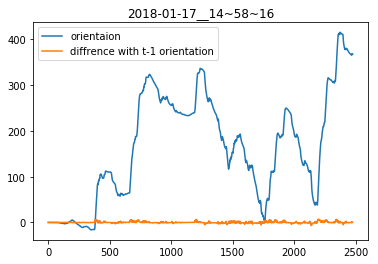

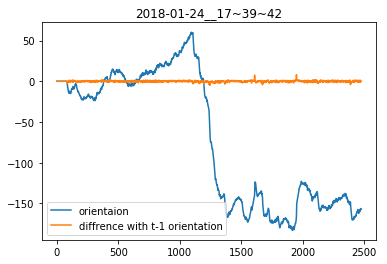

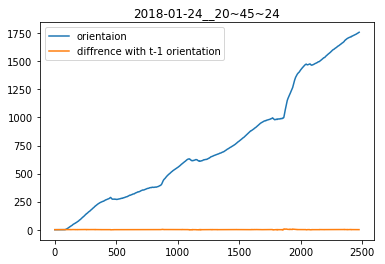

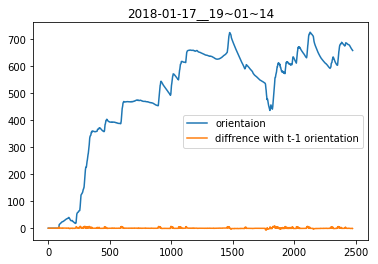

In [6]:
#def plot_orientations(wind_speed,case):
case = 1
for ts in tsl:
    df2 = df[(df.timeStamp==ts)&(df.windPressure=='1.')&(df.visual =="grassSky" ) & (df.trajectory__runNum==1)&(df.trajectory__trial==3.0) & df.trajectory__case == case ]
    lst=df2.windPressure.unique()
    if(len(lst)>0):
        print(df2.windPressure.unique())
        plt.figure()
        plt.plot(df2.trajectory__pOri_x.values,label="orientaion")
        plt.plot(np.diff(df2.trajectory__pOri_x.values),label="diffrence with t-1 orientation")
        plt.title(ts)
        plt.legend()

/home/lsr/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


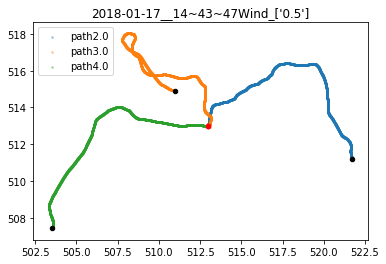

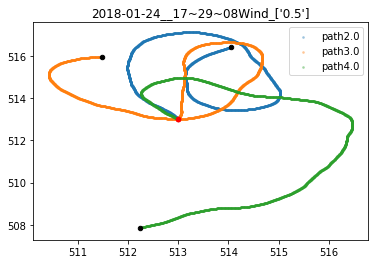

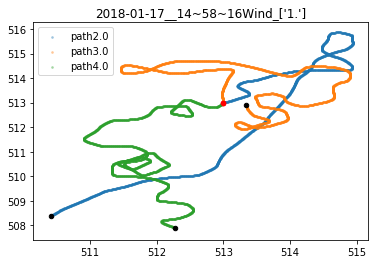

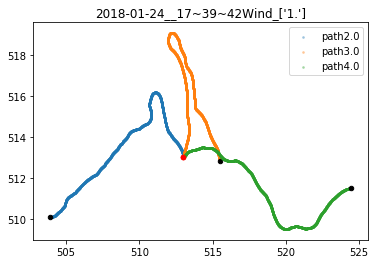

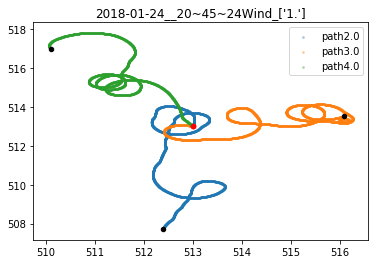

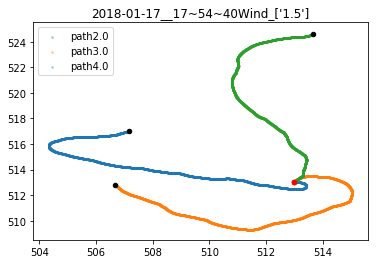

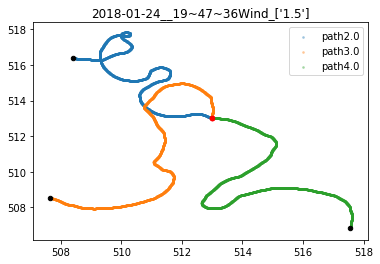

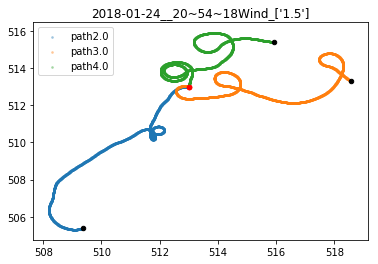

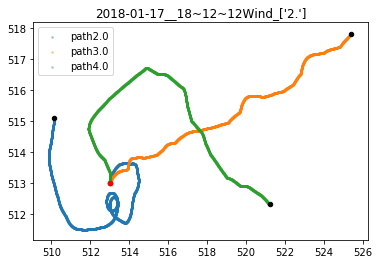

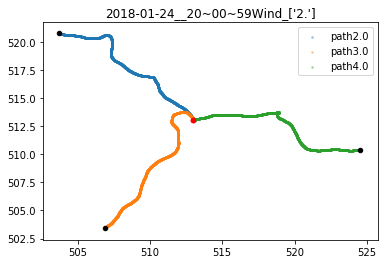

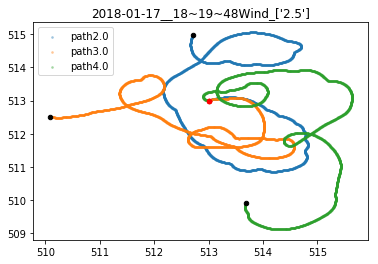

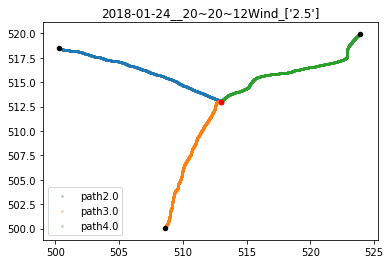

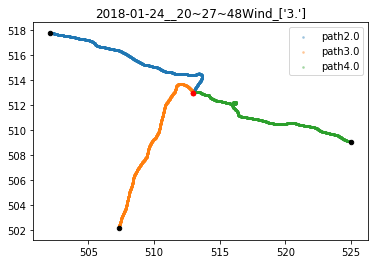

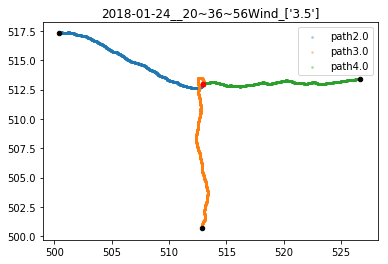

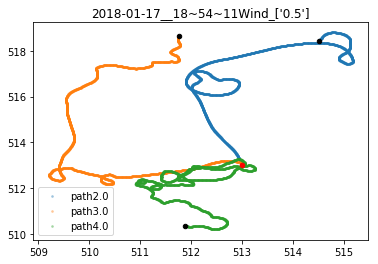

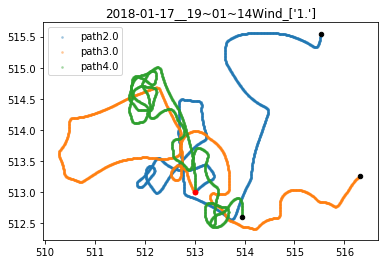

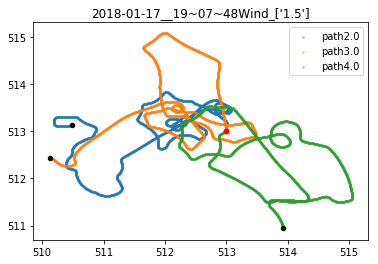

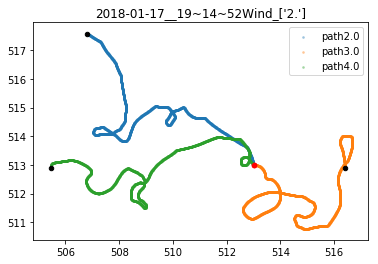

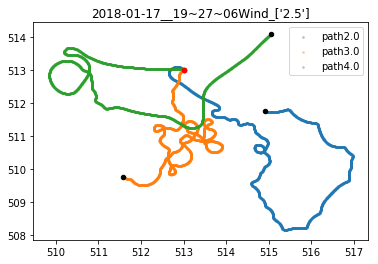

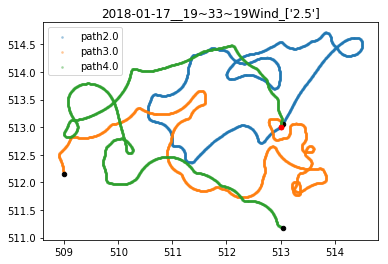

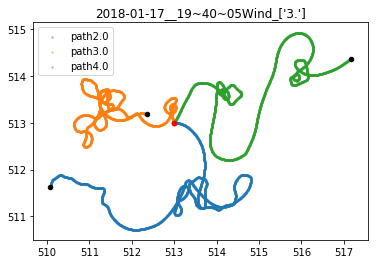

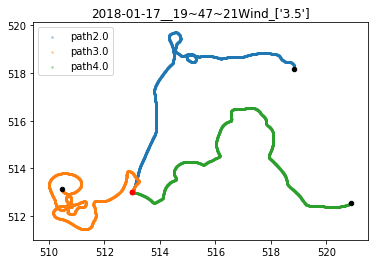

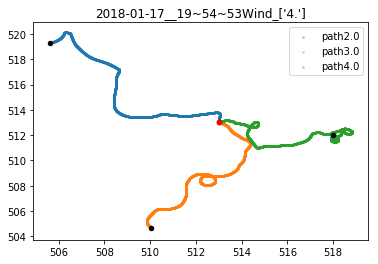

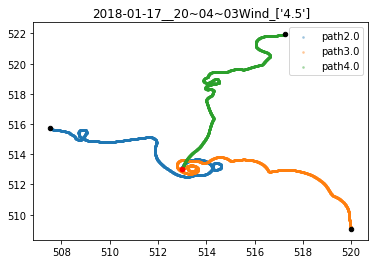

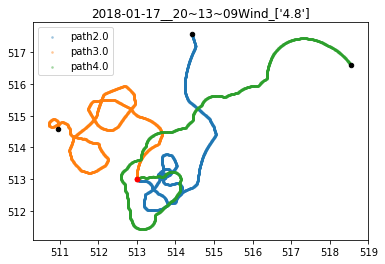

In [98]:
#def plot_orientations(wind_speed,case):
case = 1
dfs=[]
for ts in tsl:
    df2 = df[(df.timeStamp==ts)&(df.windPressure.astype(float)>0)&(df.visual =="grassSky" ) & (df.trajectory__runNum==1) & df.trajectory__case == case ]
    lst=df2.windPressure.unique()
    if(len(lst)>0):
        #print(ts)
        dfs.append(df2)
        #print(df2.windPressure.unique())
        plt.figure()
        trials=df2.trajectory__trial.unique()
        for trail in trials:
            df3= df2[df2.trajectory__trial == trail]
            plt.scatter(df3.trajectory__pPos_x,df3.trajectory__pPos_y,s=3,alpha=0.3,label="path"+str(trail))
            plt.scatter(df3.trajectory__pPos_x[0],df3.trajectory__pPos_y[0],s=20,c="red")
            #print(df3.trajectory__pPos_x[df3.shape[0]-3],df3.trajectory__pPos_y[df3.shape[0]-3])
            plt.scatter(df3.trajectory__pPos_x[df3.shape[0]-1],df3.trajectory__pPos_y[df3.shape[0]-1],s=20,c="black")
            #plt.xlim(500,526)
            #plt.ylim(500,526)    
        #plt.plot(np.diff(df2.trajectory__pOri_x.values),label="diffrence with t-1 orientation")
        plt.title(ts+"Wind_"+str(lst))
        plt.legend()

In [19]:
angl=np.arctan(df.trajectory__pPos_y.values/df.trajectory__pPos_x.values)
r=np.sqrt(df.trajectory__pPos_x.values**2 + df.trajectory__pPos_y.values**2)
df["angl"] = pd.Series(angl,df.index)
df["r"]=pd.Series(r,df.index)

In [31]:
def polar(x, y):
    r = np.sqrt(x ** 2 + y ** 2)
    if y == 0:
        theta = 180 if x < 0 else 0
    elif x == 0:
        theta = 90 if y > 0 else 270
    elif x < 0 and y < 0: #third qudrant
        theta = np.degrees(np.arctan(y / x))
        theta = 180+theta
    elif x>0 and y<0: #4th qudrant
        theta = np.degrees(np.arctan((-1.0*y) / x))
        theta = 270+theta
    elif x<0 and y >0 : #2nd quadrant
        theta = np.degrees(np.arctan(y / (-1.0*x)))
        theta = 90 + theta
    else:
        theta = np.degrees(np.arctan(float(y) / x))
    return r, theta


In [39]:
r=[]
theta=[]
for x,y in zip(df.trajectory__pPos_x.values[::30],df.trajectory__pPos_y.values[::30]):
    rad,ang=polar(x-513,y-513)
    r.append(rad)
    theta.append(ang)

In [37]:
df["r"]=pd.Series(r,df.index)
df["theta"]= pd.Series(theta,df.index)

In [42]:
dfs_=df[::30]

trajectory__DCoffset  trajectory__boutFrame  \
2018-01-17 09:08:18.538726144         -2.000000e-02                    0.0   
2018-01-17 09:08:18.717342976         -2.000000e-02                    0.0   
2018-01-17 09:08:18.899179008         -2.000000e-02                    0.0   
2018-01-17 09:08:19.080857088         -2.000000e-02                    0.0   
2018-01-17 09:08:19.262896896         -2.000000e-02                    0.0   
2018-01-17 09:08:19.444659968         -2.000000e-02                    0.0   
2018-01-17 09:08:19.626429184         -2.000000e-02                    0.0   
2018-01-17 09:08:19.808377856         -2.000000e-02                    0.0   
2018-01-17 09:08:19.990006016         -2.000000e-02                    0.0   
2018-01-17 09:08:20.171932928         -2.000000e-02                    0.0   
2018-01-17 09:08:20.353789952         -2.000000e-02                    0.0   
2018-01-17 09:08:20.535773952         -2.000000e-02                    0.0   
2018-01-17 09:08:20.717484032         -2.000000e-02                    0.0   
2018-01-17 09:08:20.899464960         -2.000000e-02                    0.0   
2018-01-17 09:08:21.081132032         -2.000000e-02                    0.0   
2018-01-17 09:08:21.263410176         -2.000000e-02                    0.0   
2018-01-17 09:08:21.444978944         -2.000000e-02                    0.0   
2018-01-17 09:08:21.626851072         -2.000000e-02                    0.0   
2018-01-17 09:08:21.808480000         -2.000000e-02                    0.0   
2018-01-17 09:08:21.990499072         -2.000000e-02                    0.0   
2018-01-17 09:08:22.172336128         -2.000000e-02                    0.0   
2018-01-17 09:08:22.354051072         -2.000000e-02                    0.0   
2018-01-17 09:08:22.535872000         -2.000000e-02                    0.0   
2018-01-17 09:08:22.717596928         -2.000000e-02                    0.0   
2018-01-17 09:08:22.899503872         -2.000000e-02                    0.0   
2018-01-17 09:08:23.081475072         -2.000000e-02                    0.0   
2018-01-17 09:08:23.263119872         -2.000000e-02                    0.0   
2018-01-17 09:08:23.444943872         -2.000000e-02                    0.0   
2018-01-17 09:08:23.626777856         -2.000000e-02                    0.0   
2018-01-17 09:08:23.808792064         -2.000000e-02                    0.0   
...                                             ...                    ...   
2018-03-30 09:08:26.442536192          2.081668e-17                    0.0   
2018-03-30 09:08:26.624381184          2.081668e-17                    0.0   
2018-03-30 09:08:26.806177024          2.081668e-17                    0.0   
2018-03-30 09:08:26.988027136          2.081668e-17                    0.0   
2018-03-30 09:08:27.169848064          2.081668e-17                    0.0   
2018-03-30 09:08:27.351725056          2.081668e-17                    0.0   
2018-03-30 09:08:27.533460992          2.081668e-17                    0.0   
2018-03-30 09:08:27.715356160          2.081668e-17                    0.0   
2018-03-30 09:08:27.897121024          2.081668e-17                    0.0   
2018-03-30 09:08:28.079144960          2.081668e-17                    0.0   
2018-03-30 09:08:28.260878080          2.081668e-17                    0.0   
2018-03-30 09:08:28.442540800          2.081668e-17                    0.0   
2018-03-30 09:08:28.624481792          2.081668e-17                    0.0   
2018-03-30 09:08:28.806364160          2.081668e-17                    0.0   
2018-03-30 09:08:28.988260864          2.081668e-17                    0.0   
2018-03-30 09:08:29.169886976          2.081668e-17                    0.0   
2018-03-30 09:08:29.351844096          2.081668e-17                    0.0   
2018-03-30 09:08:29.533762816          2.081668e-17                    0.0   
2018-03-30 09:08:29.715495936          2.081668e-17                    0.0   
2018-03-30 09:08:29.897281792          2.081668e-17  

/home/ganesh/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)
/home/ganesh/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


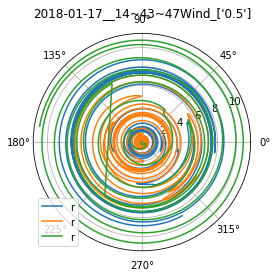

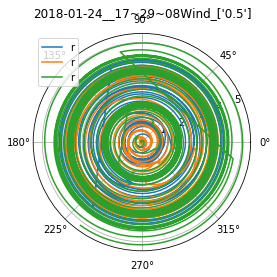

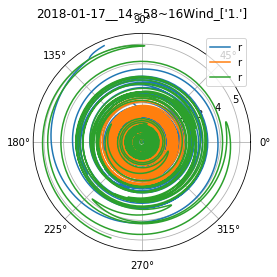

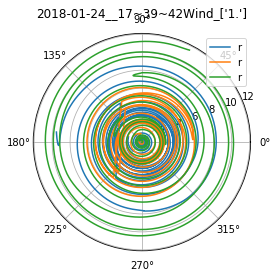

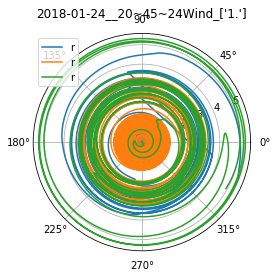

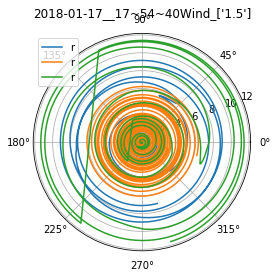

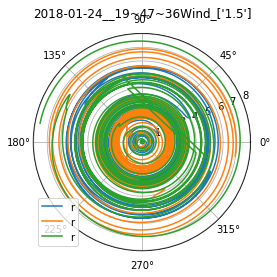

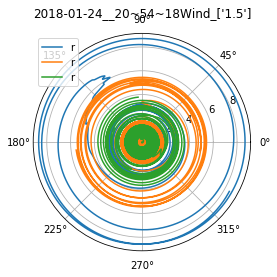

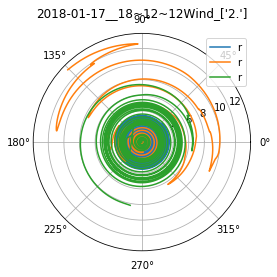

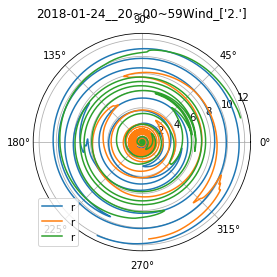

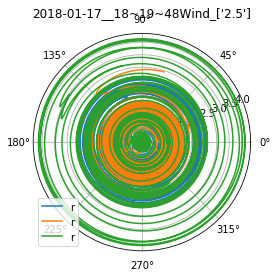

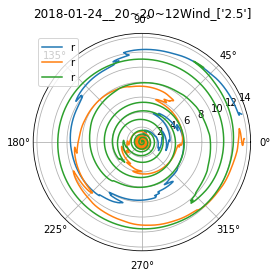

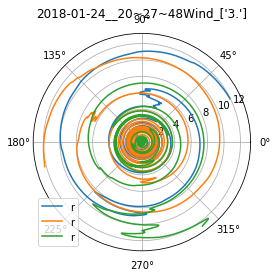

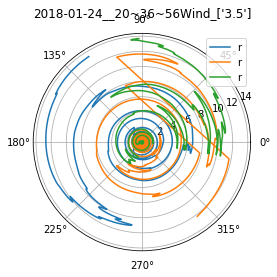

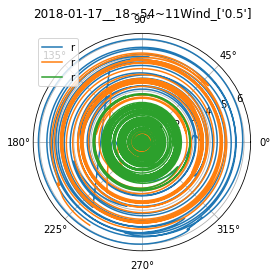

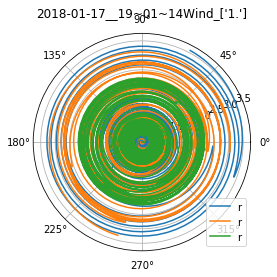

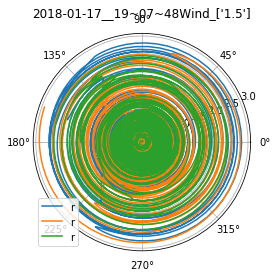

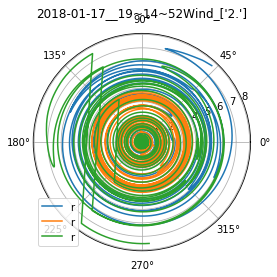

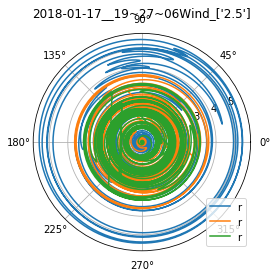

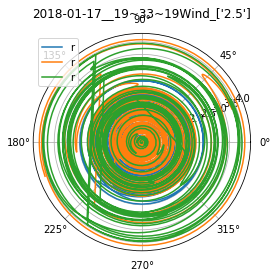

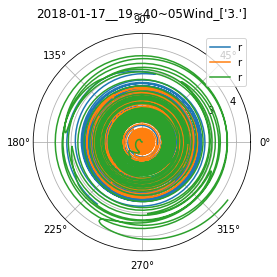

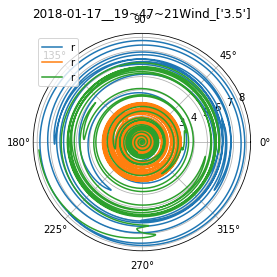

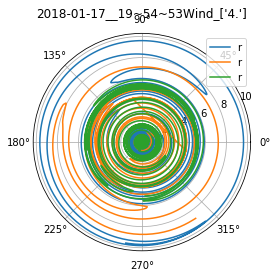

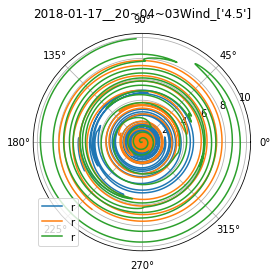

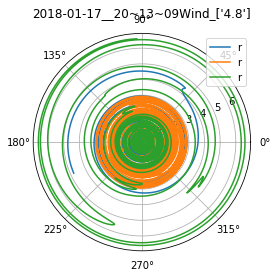

In [41]:
#def plot_orientations(wind_speed,case):
case = 1
dfs=[]
for ts in tsl:
    df2 = df[(df.timeStamp==ts)&(df.windPressure.astype(float)>0)&(df.visual =="grassSky" ) & (df.trajectory__runNum==1) & df.trajectory__case == case ]
    lst=df2.windPressure.unique()
    if(len(lst)>0):
        #print(ts)
        dfs.append(df2)
        #print(df2.windPressure.unique())
        plt.figure()
        trials=df2.trajectory__trial.unique()
        for trail in trials:
            df3= df2[df2.trajectory__trial == trail]
            ax=plt.subplot(111,projection='polar')
            ax.plot(df3.theta, df3.r)
            #ax.set_rmax(750)
            #ax.set_rmin(700)
            #print(df3.trajectory__pPos_x[df3.shape[0]-3],df3.trajectory__pPos_y[df3.shape[0]-3])
            #plt.scatter(df3.trajectory__pPos_x[df3.shape[0]-1],df3.trajectory__pPos_y[df3.shape[0]-1],s=20,c="black")
            #plt.xlim(500,526)
            #plt.ylim(500,526)    
        #plt.plot(np.diff(df2.trajectory__pOri_x.values),label="diffrence with t-1 orientation")
        plt.title(ts+"Wind_"+str(lst))
        plt.legend()

In [ ]:
df.trajectory__pPos_x.values/df.trajectory__pPos_

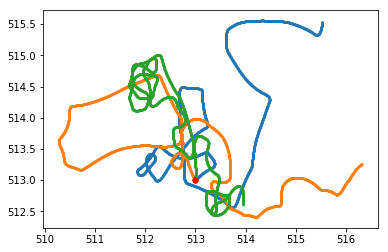

In [58]:
#plt.scatter(dfs[0].trajectory__pPos_x,dfs[0].trajectory__pPos_y,s=3,alpha=0.5)
#plt.scatter(dfs[1].trajectory__pPos_x,dfs[1].trajectory__pPos_y,s=3,alpha=0.5)
ind=3
plt.scatter(dfs[ind].trajectory__pPos_x[:2500],dfs[ind].trajectory__pPos_y[:2500],s=3,alpha=0.5)
plt.scatter(dfs[ind].trajectory__pPos_x[2500:5000],dfs[ind].trajectory__pPos_y[2500:5000],s=3,alpha=0.5)
plt.scatter(dfs[ind].trajectory__pPos_x[5000:],dfs[ind].trajectory__pPos_y[5000:],s=3,alpha=0.5)
plt.scatter(dfs[ind].trajectory__pPos_x[0],dfs[ind].trajectory__pPos_y[0],s=30,label="start",c="red")

/home/lsr/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


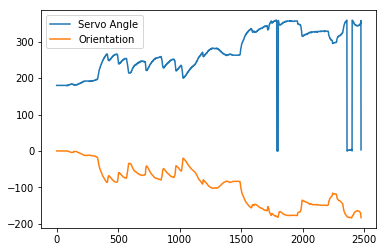

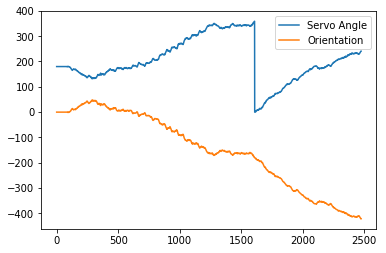

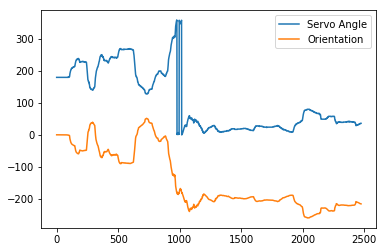

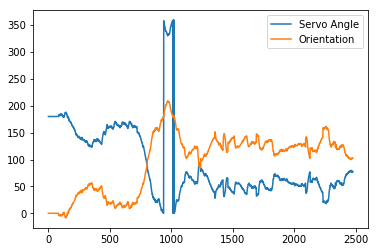

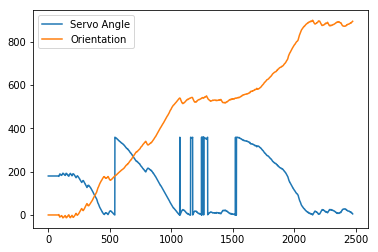

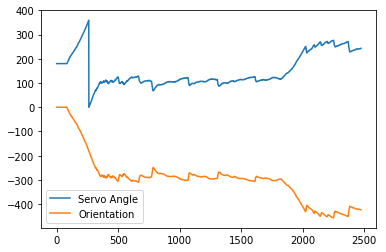

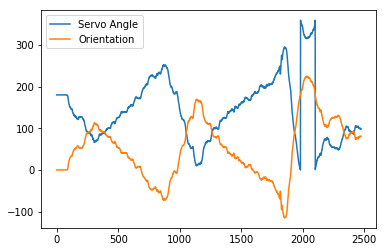

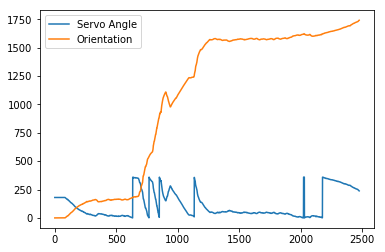

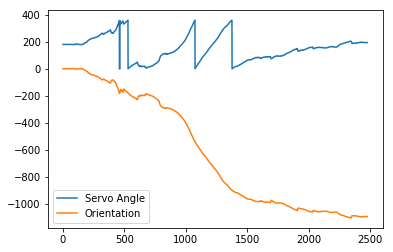

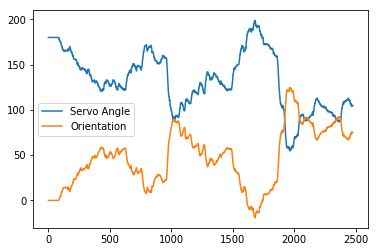

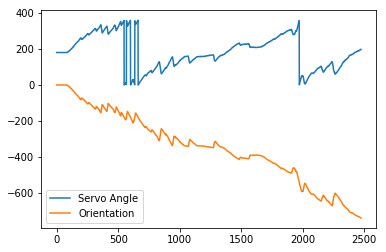

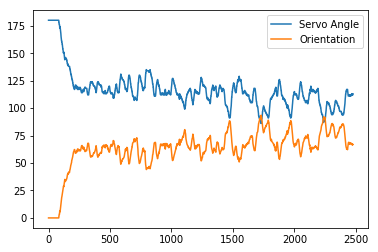

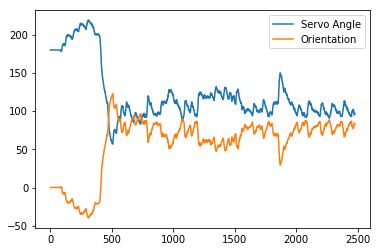

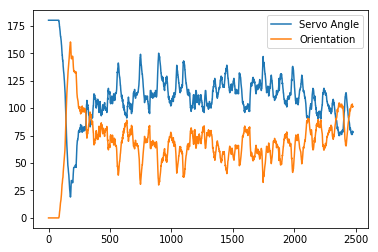

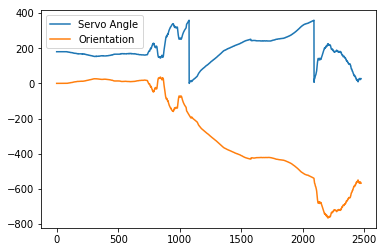

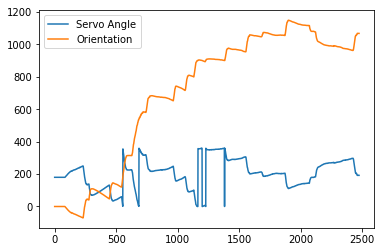

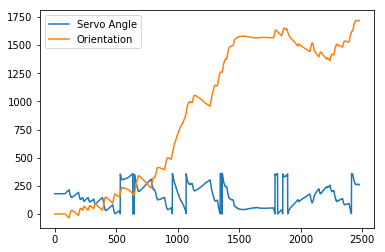

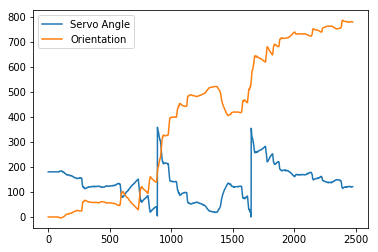

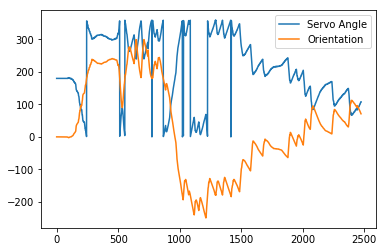

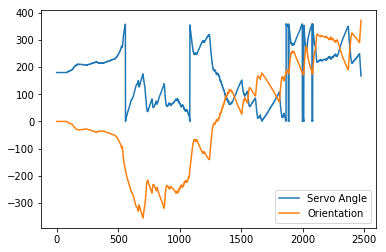

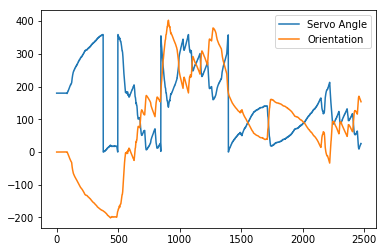

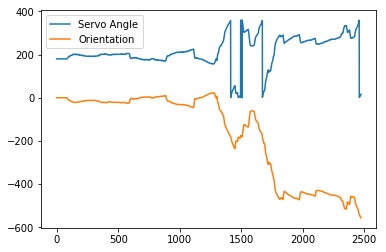

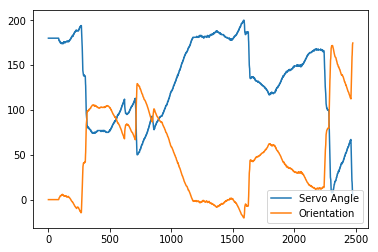

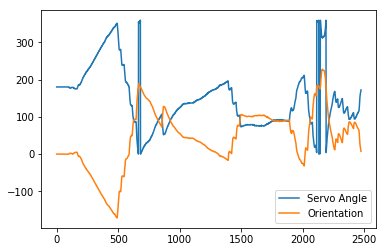

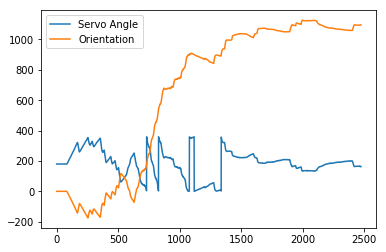

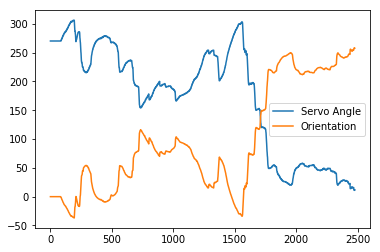

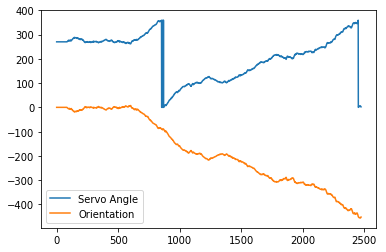

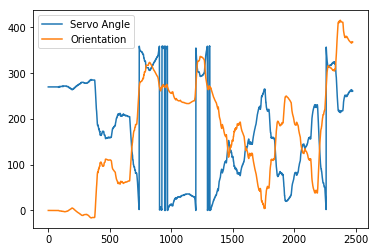

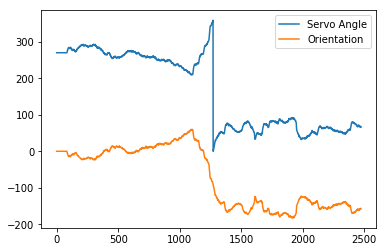

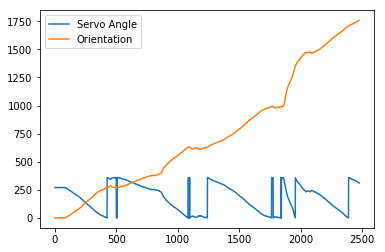

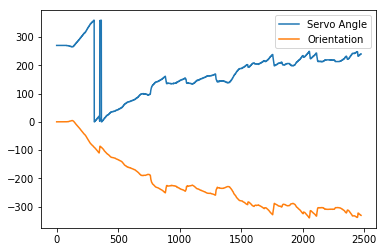

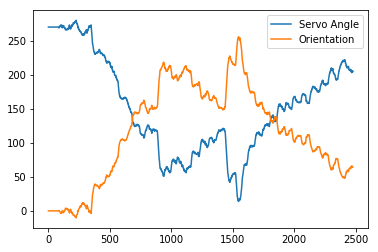

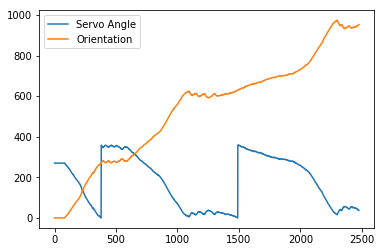

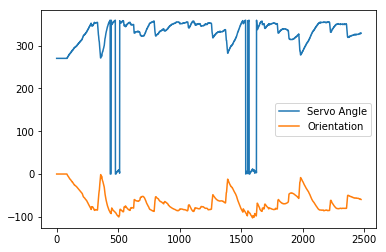

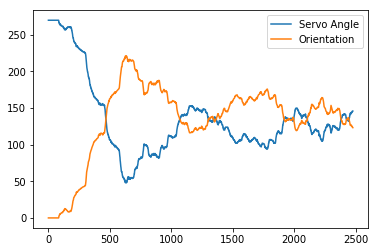

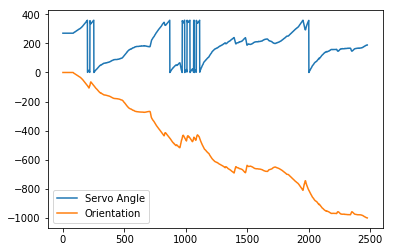

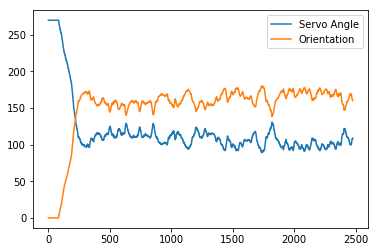

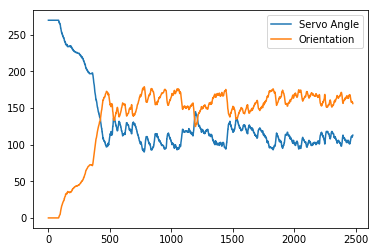

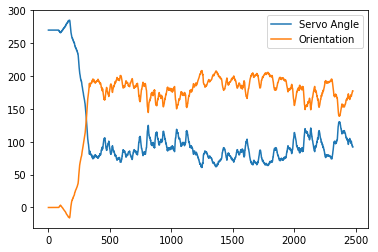

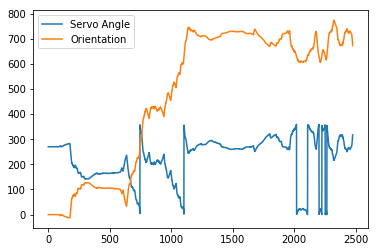

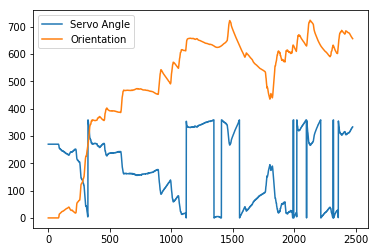

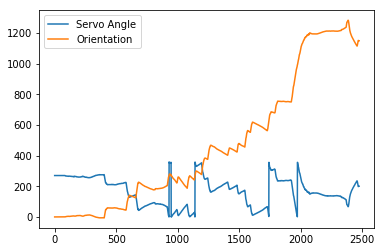

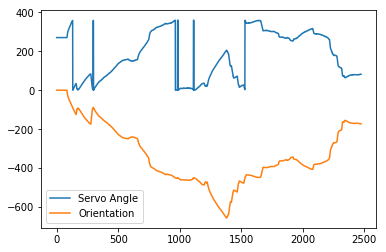

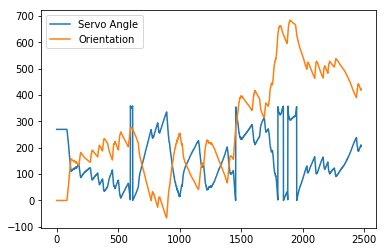

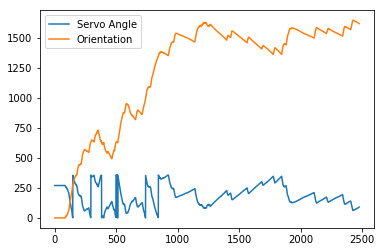

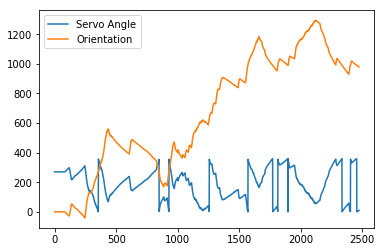

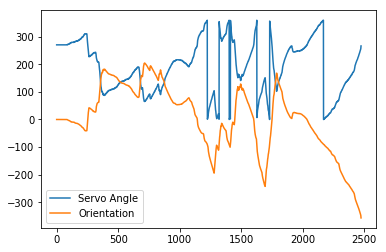

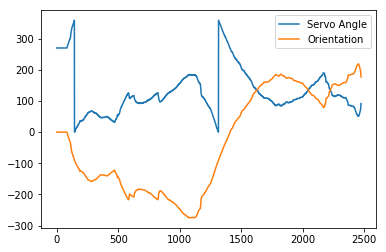

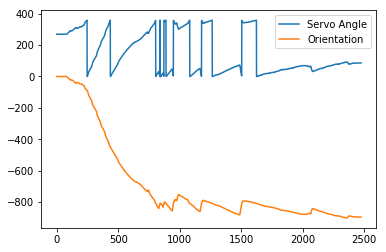

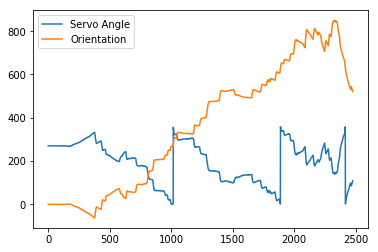

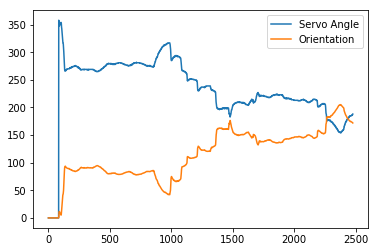

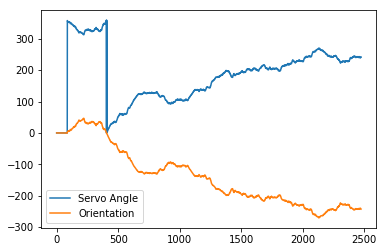

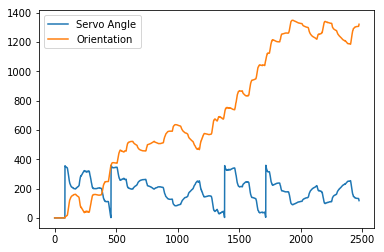

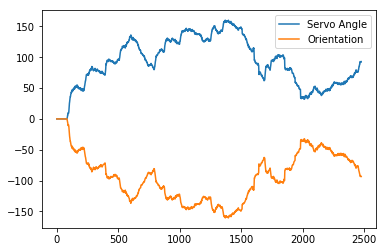

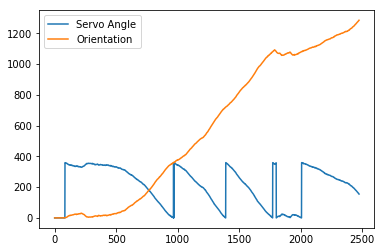

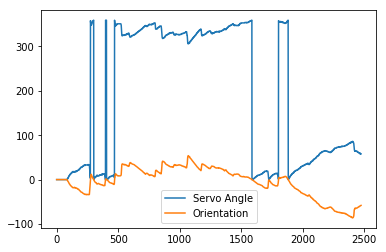

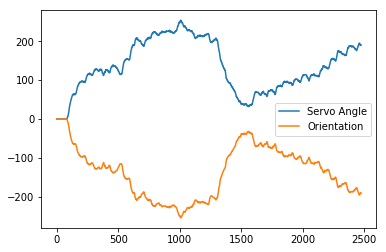

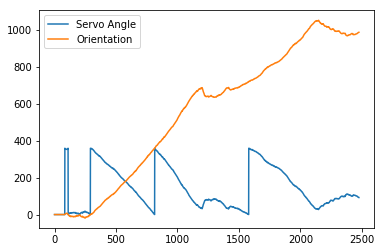

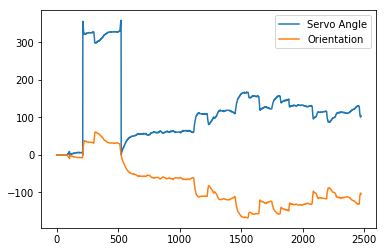

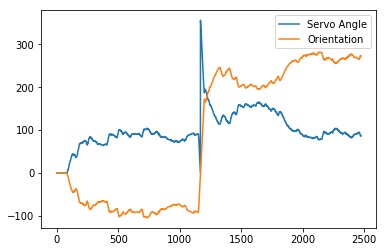

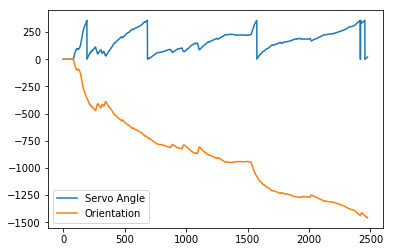

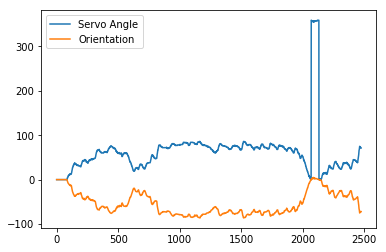

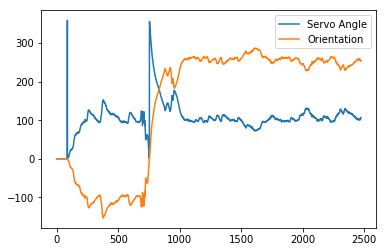

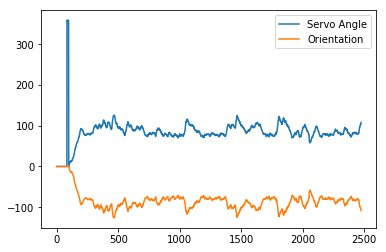

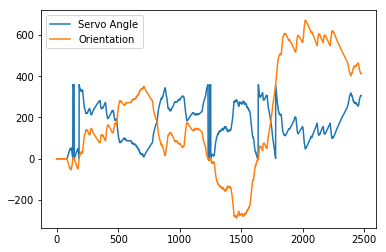

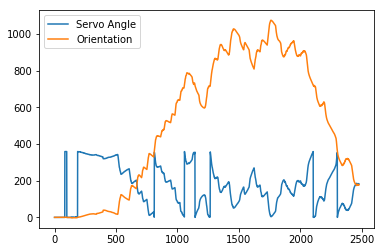

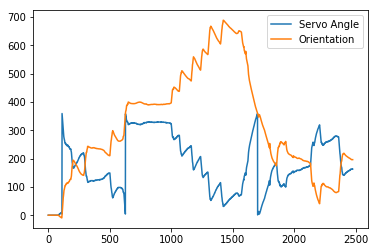

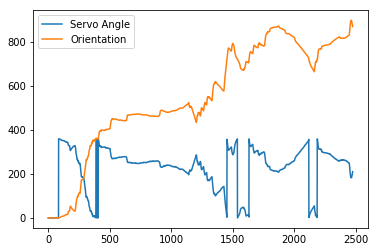

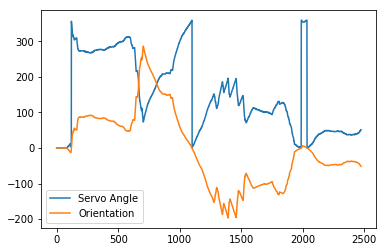

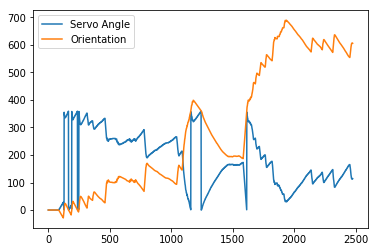

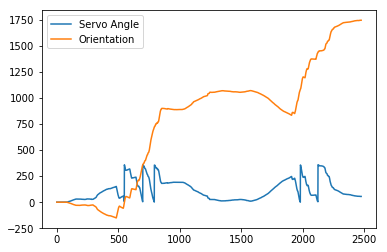

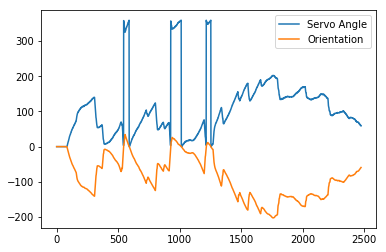

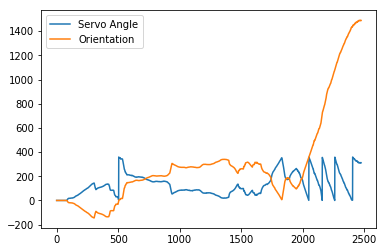

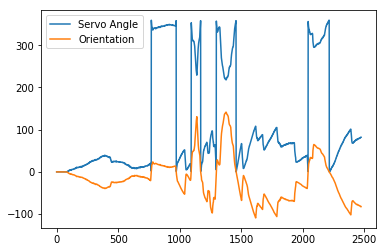

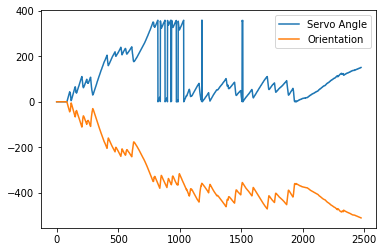

In [102]:
for trial in [2,3,4]:
    for ind in range(len(dfs)):
        plt.figure()
        #plt.subplot(4,1,1)
        plt.plot(dfs[ind].trajectory__servoAngle.values[dfs[ind].trajectory__trial==trial],label="Servo Angle")
        #plt.subplot(2,1,2)
        plt.plot(dfs[ind].trajectory__pOri_x.values[dfs[ind].trajectory__trial==trial],label="Orientation")
        #plt.subplot()
        plt.legend()

In [72]:
# case=1
# dec=30
# for ts in tsl[:20]:
#     df2=df[(df.timeStamp==ts)&(df.trajectory__case==case)&(df.windPressure.astype(float)>2.4)].ix[::dec]
#     plt.figure()
#     plt.scatter(df2.trajectory__pPos_x,df2.trajectory__pPos_y,s=3,alpha=0.3)
#     plt.xlim(500,526)
#     plt.ylim(500,526)    

In [6]:
x=df.trajectory__pPos_x-513
y=df.trajectory__pPos_y-513

In [9]:
ang=np.arctan(y.values/x.values)

/home/ganesh/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in true_divide
  """Entry point for launching an IPython kernel.
/home/ganesh/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in true_divide
  """Entry point for launching an IPython kernel.
/home/ganesh/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in arctan
  """Entry point for launching an IPython kernel.


In [12]:
angDeg=ang*180/np.pi

In [13]:
df.trajectory__pOri_x.values

array([   0.        ,    0.        ,    0.        , ..., -531.25164795,
       -534.19464111, -537.04266357])

In [79]:
# for nm,grp in groups:
#     plt.figure()
#     plt.plot(grp["trajectory__pPos_x"].values,grp["trajectory__pPos_y"].values)

In [16]:
np.arctan((np.tan(np.pi/2)))

1.5707963267948966

In [80]:
# for nm,grp in groups:
#     plt.figure()
#     plt.plot(np.arctan(grp["trajectory__pPos_y"].values/grp["trajectory__pPos_x"].values))

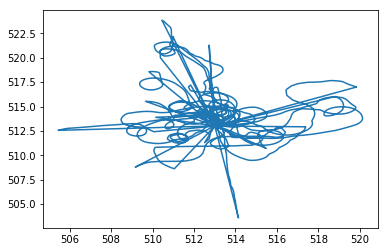

In [25]:
plt.plot(grp["trajectory__pPos_y"],grp["trajectory__pPos_x"])

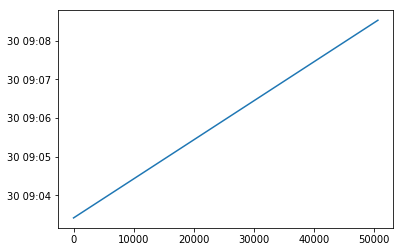

In [43]:
p

(array([    0.,     0.,     0.,     0.,     0., 50670.,     0.,     0.,
            0.,     0.]),
 array([2.5, 2.6, 2.7, 2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5]),
 <a list of 10 Patch objects>)

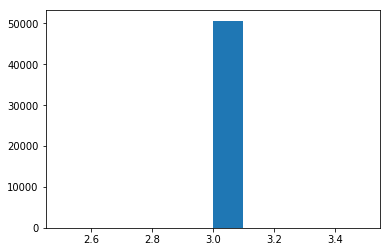

In [28]:
plt.hist(grp["trajectory__quadrant"])

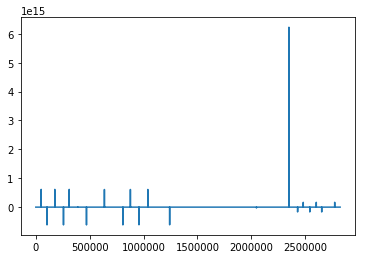

In [89]:
plt.plot(np.diff(zzz))

In [100]:
yy = [zzz[i].item() for i in range(len(zzz))]

In [93]:
str([1,2,233])

'[1, 2, 233]'